In [1]:
from src.ConsecutiveOccurrence import *
from src.utils import *
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'src'

In [2]:
params = {"record_len_mean" : 10, "record_dim" : 100, "alpha_range" : [5,10], "beta_range" : [240,260],
          "record_len_min" : 3, "confounding_var_num" : 1, "progression_var_num" : 3, 
          "p_range" : [1.3, 1.4], "treatment_effect" : -5, "outcome_bias" : 10, "alpha" : 10, 
         "ps_noise_var" : 0.01, "outcome_noise_var" : 0.1, "num_token_reserve" : 4, "prob_reverse_progression" : 0}

In [3]:
EHR_CO = EHRgeneratorCO(params)

In [4]:
EHR_CO.set_variables()

setting progression_var and confounding_var
progression_var : [59 42 66]
confounding_var : [66]


In [ ]:
EHR_CO.generate_record(100000)

In [18]:
EHR_CO.update_occurrence_sum_dict()

In [12]:
len(EHR_CO.occurrence_sum_dict[4])

3041

In [19]:
EHR_CO.build_record_by_occurrence_sum([0,1,2,3,4],[1000,1000,2000,4000,4000])

occurrence sum 0 : 29952 patients
occurrence sum 1 : 28157 patients
occurrence sum 2 : 18365 patients
occurrence sum 3 : 10832 patients
occurrence sum 4 : 5913 patients


In [26]:
EHR_CO.split_record_nfold(10)

splitting 1-fold
splitting 2-fold
splitting 3-fold
splitting 4-fold
splitting 5-fold
splitting 6-fold
splitting 7-fold
splitting 8-fold
splitting 9-fold
splitting 10-fold


In [27]:
EHR_CO.save_record_nfold("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/CO_10/")

In [28]:
EHR_CO.save_record("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/CO_10/")

In [29]:
EHR_CO.save_params("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/CO_10/")

In [20]:
def count_co(data_dict):
    
    co_list = []
    
    for pid, item in data_dict.items():
        
        consecutive_occurrence = item["consecutive_occurrence"]
        co_list.append(consecutive_occurrence)
        

    return co_list

In [21]:
co_list = count_co(EHR_CO.occurrence_sum_record)

(array([1000.,    0., 4422.,    0.,    0., 4695.,    0., 1582.,    0.,
         301.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

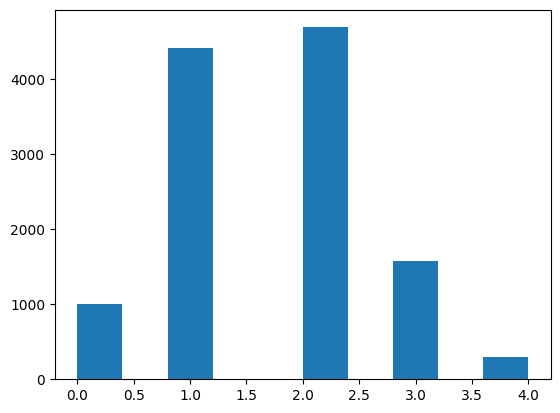

In [22]:
plt.hist(co_list)

In [23]:
def get_ps_distribution(patient_record):
    
    treated_ps = []
    control_ps = []
    
    for pid, item in tqdm(patient_record.items()):
                
        if item["treatment_assignment"] == 1:
            treated_ps.append(item["treatment_prob"].item())
        else:
            control_ps.append(item["treatment_prob"].item())
            
    return treated_ps, control_ps

In [24]:
treated_ps, control_ps = get_ps_distribution(EHR_CO.occurrence_sum_record)

100%|████████████████████████████████████████████████████████████████████████| 12000/12000 [00:00<00:00, 332388.84it/s]


(array([8.60461771e-01, 5.31461682e+00, 2.81421615e+00, 1.31600036e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.01230797e-02, 1.76141586e+00,
        1.69055430e+01, 1.21780648e+01, 7.69354054e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.18738656e-01,
        7.21775580e+00, 4.53513969e+00, 2.53076992e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.06153983e-02,
        7.49107895e-01, 1.10341568e+00, 8.09846373e-02, 1.01230797e-02,
        7.08615576e-02, 1.01230797e-01]),
 array([0.06848001, 0.08645384, 0.10442767, 0.1224015 , 0.14037533,
        0.15834916, 0.1763

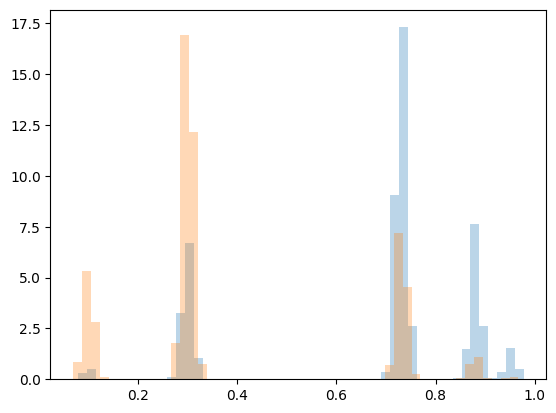

In [25]:
plt.hist(treated_ps, density=True, bins=50, alpha=0.3)
plt.hist(control_ps, density=True, bins=50, alpha=0.3)